# MachineLearning Working Group

### Python PCA - September 5, 2018

As with the [R walkthrough](https://github.com/dlab-berkeley/MachineLearningWG/blob/master/Fall2018/sep5-PCA/PCA-R.Rmd), let's begin by replicating [another great example](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) for conducting PCA in Python and then see a machine learning application. 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the iris dataset

In [2]:
iris = pd.read_csv('./iris.csv')
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


# Define the nuemric features

In [3]:
Features = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]
x = iris.loc[:, Features].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Standardize the numeric features

In [4]:
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# Extract the target variable

In [5]:
y = iris.loc[:,["Species"]].values
y

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
    

# Define the 2D PCA feature space

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


# Concatenate the Species vector the principal component arrays

In [8]:
iris_pca = pd.concat([iris[["Species"]], pca_df], axis = 1)
iris_pca.head()

,Species,principal component 1,principal component 2
0,setosa,-2.264703,0.480027
1,setosa,-2.080961,-0.674134
2,setosa,-2.364229,-0.341908
3,setosa,-2.299384,-0.597395
4,setosa,-2.389842,0.646835


# Construct the scatterplot

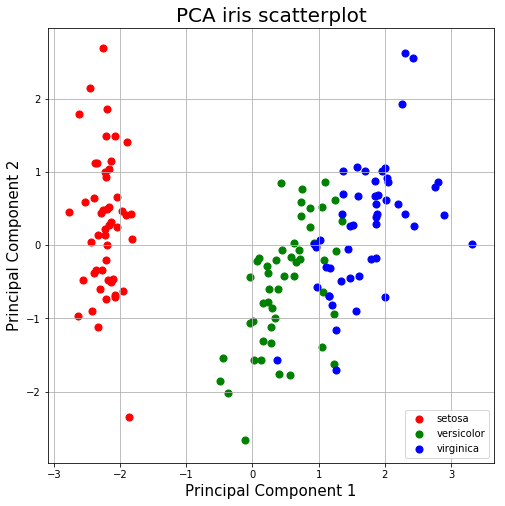

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("PCA iris scatterplot", fontsize = 20)
targets = ["setosa", "versicolor", "virginica"]
colors = ["r", "g", "b"]
for target, color in zip(targets,colors):
    indicesToKeep = iris_pca["Species"] == target
    ax.scatter(iris_pca.loc[indicesToKeep, "principal component 1"]
               , iris_pca.loc[indicesToKeep, "principal component 2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [10]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

# Proportions of variance are similar to R!
The proportions of variance are virtually identical to those we obtained in R: 

- PC 1 = 0.7296245 
- PC 2 = 0.2285076

# Machine Learning example

Now, let's use PCA to optimize a logistic regression model. 

In [11]:
# Load the mnist dataset
mnist = fetch_mldata('MNIST original')

In [12]:
# Split the data with a 70/30 split
# Define our training and test images and our training and test labels
# random_state is like setting the seed in R and ensures reproducible results
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

# Initialize the scaler to standardize the data (remember that PCA is grossly affected by scale!)
scaler = StandardScaler()

# Fit model to training set

In [13]:
scaler.fit(train_img)

train_img = scaler.transform(train_img)

test_img = scaler.transform(test_img)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Initialize the PCA model

In [15]:
# change the value in the parentheses to tell the model how much variation should be retained. 
# We want 95% of it so we enter 0.95
mnist_pca = PCA(0.95)
mnist_pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Do the transform on the training and test sets

In [16]:
train_img = mnist_pca.transform(train_img)
test_img = mnist_pca.transform(test_img)

# Initialize logistic regression
... with default settings

In [17]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([1.])

In [19]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [20]:
logisticRegr.score(test_img, test_lbl)

0.92

View [this webpage](https://plot.ly/ipython-notebooks/principal-component-analysis/) for another great example. 